In [27]:
import pandas as pd
from matplotlib.cm import binary
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble  import RandomForestClassifier,RandomForestRegressor
# from sklearn.svm import SVC
# from sklearn import svm
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import SGDClassifier, LogisticRegression,LinearRegression
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,mean_squared_error
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from pandas.plotting import scatter_matrix
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [4]:
mnist_data = np.array(mnist['data'])
mnist_labels = np.array(mnist['target'])

In [5]:
print(mnist_data.shape)
print(mnist_labels.shape)

(70000, 784)
(70000,)


In [6]:
mnist_redata = mnist_data.reshape(70000,28,28)

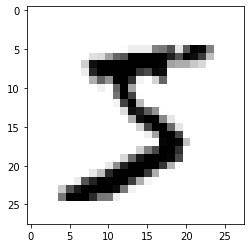

In [7]:
plt.imshow(mnist_redata[0],cmap=binary,interpolation="nearest")

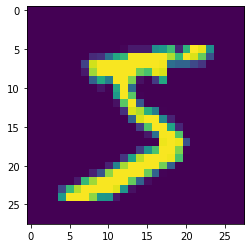

In [8]:
plt.imshow(mnist_redata[0],interpolation="nearest")

In [21]:
#is dataset ko set is tareeke se kiya h ki pehle 60000 train and bache huye test
mnist_train_data,mnist_train_labels = mnist_data[:600],mnist_labels[600:700]
mnist_test_data,mnist_test_labels = mnist_data[600:700],mnist_labels[600:700]
print(mnist_train_labels)

['9' '9' '8' '0' '1' '4' '4' '6' '7' '1' '5' '7' '0' '3' '5' '8' '4' '7'
 '1' '2' '5' '9' '5' '6' '7' '5' '9' '8' '8' '3' '6' '9' '7' '0' '7' '5'
 '7' '1' '1' '0' '7' '9' '2' '3' '7' '3' '2' '4' '1' '6' '2' '7' '5' '5'
 '7' '4' '0' '2' '6' '3' '6' '4' '0' '4' '2' '6' '0' '0' '0' '0' '3' '1'
 '6' '2' '2' '3' '1' '4' '1' '5' '4' '6' '4' '7' '2' '8' '7' '9' '2' '0'
 '5' '1' '4' '2' '8' '3' '2' '4' '1' '5']


In [22]:
shuffle = np.random.permutation(600)
mnist_train_data,mnist_train_labels = mnist_data[shuffle],mnist_labels[shuffle]
print(mnist_train_labels)

['3' '0' '1' '8' '4' '8' '9' '6' '8' '2' '2' '0' '6' '8' '0' '8' '8' '9'
 '4' '5' '0' '8' '4' '4' '4' '1' '5' '9' '1' '3' '4' '1' '6' '8' '1' '0'
 '9' '4' '0' '9' '7' '2' '7' '4' '3' '2' '4' '1' '1' '7' '8' '5' '2' '5'
 '9' '9' '8' '5' '9' '7' '7' '8' '5' '4' '7' '1' '8' '2' '9' '8' '9' '4'
 '5' '5' '1' '9' '5' '3' '2' '8' '9' '7' '6' '3' '0' '9' '5' '7' '3' '6'
 '1' '5' '0' '1' '0' '4' '8' '3' '1' '8' '5' '9' '1' '0' '5' '9' '0' '5'
 '0' '4' '2' '9' '4' '2' '5' '7' '6' '0' '4' '2' '8' '7' '4' '3' '8' '3'
 '1' '2' '7' '9' '1' '4' '6' '5' '7' '3' '6' '4' '1' '6' '7' '0' '4' '1'
 '7' '5' '1' '9' '8' '2' '3' '9' '4' '4' '4' '4' '2' '9' '2' '2' '5' '4'
 '0' '7' '9' '2' '1' '3' '1' '3' '0' '0' '1' '9' '8' '8' '1' '1' '5' '9'
 '5' '2' '4' '8' '6' '0' '1' '0' '6' '3' '9' '4' '1' '0' '8' '4' '6' '2'
 '5' '7' '1' '4' '5' '6' '7' '1' '3' '9' '2' '1' '6' '3' '7' '2' '6' '8'
 '2' '1' '5' '9' '8' '2' '3' '0' '3' '6' '6' '0' '3' '1' '7' '2' '7' '6'
 '3' '6' '0' '0' '2' '1' '4' '5' '0' '7' '8' '2' '5

In [23]:
model = RandomForestClassifier()
kfold = KFold(n_splits=5,random_state=42,shuffle=True)
result = cross_val_score(model,mnist_train_data,mnist_train_labels,cv=kfold,scoring='accuracy')
print(result.mean())

0.8666666666666666


In [25]:
model.fit(mnist_train_data,mnist_train_labels)
test_result = model.predict(mnist_test_data)

In [28]:
accuracy_score(test_result,mnist_test_labels)

0.81